Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.74
Feature Importances:
                                   Feature  Importance
0                                     AGE     0.219299
2                                     SITE    0.155208
9                   Pathologic group Stage    0.119199
5                                       pT    0.115369
6                                       pN    0.100565
7   (surgery is compulsory for all ) RT/CT    0.083669
3                                       cT    0.075960
4                                       cN    0.048782
8                DEGREE OF DIFFERENTIATION    0.042152
1                                      SEX    0.039796


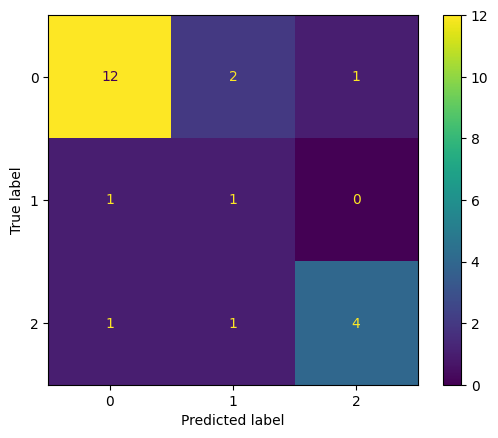

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.25      0.50      0.33         2
           2       0.80      0.67      0.73         6

    accuracy                           0.74        23
   macro avg       0.64      0.66      0.63        23
weighted avg       0.79      0.74      0.76        23

0.7391304347826086


In [13]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling data
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  # For model evaluation
import matplotlib.pyplot as plt  # For data visualization

# Read the dataset
df = pd.read_excel('Dataset_OSCC (2) (1) (1).xlsx')

# Encode the target variable
label_encoder = LabelEncoder()  # Initialize label encoder
df['Recurrence'] = label_encoder.fit_transform(df['Recurrence'])  # Encode the 'Recurrence' column into numerical values

# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns  # Identify categorical columns
for column in categorical_columns:  # Iterate over each categorical column
    df[column] = label_encoder.fit_transform(df[column])  # Encode each categorical column into numerical values

# Features and target variable
X = df.drop(columns=['Recurrence', 'Sl No ', 'Duration'])  # Features
y = df['Recurrence']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data with 80% training and 20% testing

# Feature Scaling
scaler = StandardScaler()  # Initialize scaler
X_train_scaled = scaler.fit_transform(X_train)  # Scale the training features
X_test_scaled = scaler.transform(X_test)  # Scale the testing features

# Random Forest classifier with GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

rf_classifier = RandomForestClassifier(random_state=42)  # Initialize Random Forest classifier
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)  # GridSearchCV for hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)  # Fit the model

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)  # Print the best parameters found by GridSearchCV

# Predictions
y_pred = grid_search.predict(X_test_scaled)  # Predict on the testing set

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Accuracy: {accuracy:.2f}")  # Print accuracy score

# Feature Importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': grid_search.best_estimator_.feature_importances_})  # Create DataFrame for feature importances
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)  # Sort feature importances
print("Feature Importances:")  # Print feature importances
print(feature_importances)  # Print feature importances DataFrame

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)  # Calculate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)  # Create ConfusionMatrixDisplay object
disp.plot()  # Plot confusion matrix
plt.show()  # Show plot

# Classification Report
print(classification_report(y_test, y_pred))  # Print classification report

# Accuracy Score
acs = accuracy_score(y_test, y_pred)  # Calculate accuracy score
print(acs)  # Print accuracy score
